## Bussiness case: To predict whether the patient will have the diabeties or not?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
data= pd.read_csv("diabetes1.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Basic checks 
### Exploratory Data analysis
### Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# Checking weather any column has 0 values
data.loc[data['Glucose']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
data.loc[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [9]:
data.loc[data['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [10]:
data.loc[data['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
# COunting the total number of 0 values in BMI column

data['BMI'].value_counts()[0]

11

In [12]:
data.loc[data['DiabetesPedigreeFunction']==0]    # No 0 values in this column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [13]:
data.loc[data['Age']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [14]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())#replacing 0 with mean of the bmi 
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())#replacing 0 with mean of the Bloodpressure 
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())##replacing 0 with mean of the Glucose
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())#replacing 0 with mean of the Insulin
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())#replacing 0 with mean of the Skinthickness

In [15]:
# To confirm whether all the 0 values in colum are replaced
data[data['Glucose']==0].value_counts().sum()

0

In [16]:
data[data['BloodPressure']==0].value_counts().sum()

0

In [17]:
data[data['SkinThickness']==0].value_counts().sum()

0

In [18]:
data[data['Insulin']==0].value_counts().sum()

0

In [19]:
data[data['BMI']==0].value_counts().sum()

0

### Now our data has no Null values and NO 0 values

In [20]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=scale.fit_transform(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


## Feature Selection

In [24]:
corr_data= data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

<AxesSubplot:>

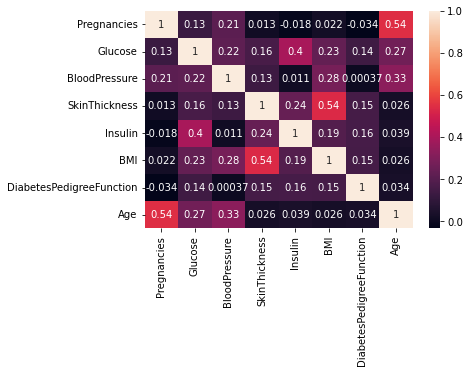

In [25]:
sns.heatmap(corr_data.corr(),annot=True)

In [26]:
## There is no relationship among the columns 


In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
data.duplicated().sum()

0

In [29]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Model creation

In [67]:
X= data.iloc[:,1:-1]
Y= data.Outcome

In [68]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

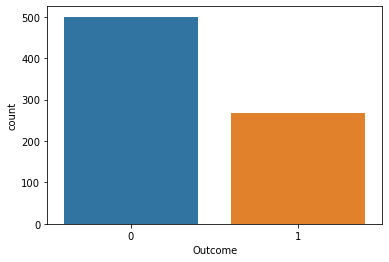

In [69]:
sns.countplot(Y);

In [70]:
# Balencing the data

from imblearn.over_sampling import SMOTE
smote= SMOTE()

In [71]:
X_smote, Y_smote= smote.fit_resample(X,Y)

In [72]:
from collections import Counter
print('Actual classes', Counter(Y))
print('Smote classes',Counter(Y_smote))

Actual classes Counter({0: 500, 1: 268})
Smote classes Counter({1: 500, 0: 500})


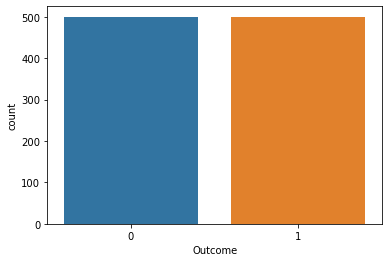

In [73]:
sns.countplot(Y_smote);

### Now we have balenced data so lets train and test the model

In [74]:
## Creating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_smote, Y_smote, random_state=3)

In [75]:
# Support vector classifier model

from sklearn.svm import SVC
svclassifier= SVC()
svclassifier.fit(X_train,Y_train)

SVC()

In [76]:
#Predict output for X_test

Y_hat= svclassifier.predict(X_test)
Y_hat

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [77]:
# Evaluating the model created

from sklearn.metrics import accuracy_score, classification_report, f1_score
acc= accuracy_score(Y_test, Y_hat)
acc

0.756

In [78]:
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       118
           1       0.80      0.71      0.76       132

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



In [79]:
f1= f1_score(Y_test,Y_hat)
f1

0.7550200803212852

In [80]:
sclassifier= SVC(kernel="linear")
sclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [81]:
Y_pred= sclassifier.predict(X_test)

In [82]:
f1_score(Y_test,Y_pred)

0.7520000000000001

In [83]:
sclassifier= SVC(kernel="poly")
sclassifier.fit(X_train, Y_train)

SVC(kernel='poly')

In [84]:
Y_p= sclassifier.predict(X_test)
f1_score(Y_test,Y_p)

0.7217391304347825

In [85]:
# Checking cross validation score

from sklearn.model_selection import cross_val_score

scores= cross_val_score(svclassifier,X,Y, cv=2, scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean()) 
print("Std :",scores.std())

[0.59504132 0.61883408]
Cross validation Score: 0.6069377015157691
Std : 0.011896379201719653


In [86]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
             
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,scoring='f1',cv=3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.748 total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.672 total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.735 total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.032 total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.047 total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.077 total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.000 total time=   0.0s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.000 total time=   0.0s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [87]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1}
SVC(C=100, gamma=1, random_state=42)


In [88]:
clf=SVC(C=100, gamma=1,random_state=42)

In [89]:
clf.fit(X_train, Y_train)

SVC(C=100, gamma=1, random_state=42)

In [90]:
Y_clf=clf.predict(X_test)

In [91]:
print(classification_report(Y_test,Y_clf))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       118
           1       0.83      0.74      0.78       132

    accuracy                           0.78       250
   macro avg       0.79      0.79      0.78       250
weighted avg       0.79      0.78      0.78       250



In [92]:
f1=f1_score(Y_test,Y_clf)
f1

0.784

In [93]:
scores_after = cross_val_score(clf,X,Y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())

[0.66292135 0.58064516 0.65822785]
Cross validation Score: 0.6339314525687317
Std : 0.011896379201719653
